In [11]:
from trading_rookie.data.get_data import DataDownloader

data_downloader = DataDownloader()
data = data_downloader.yahoo(symbol="AAPL", start_date="2025-12-01", end_date="2026-2-22")

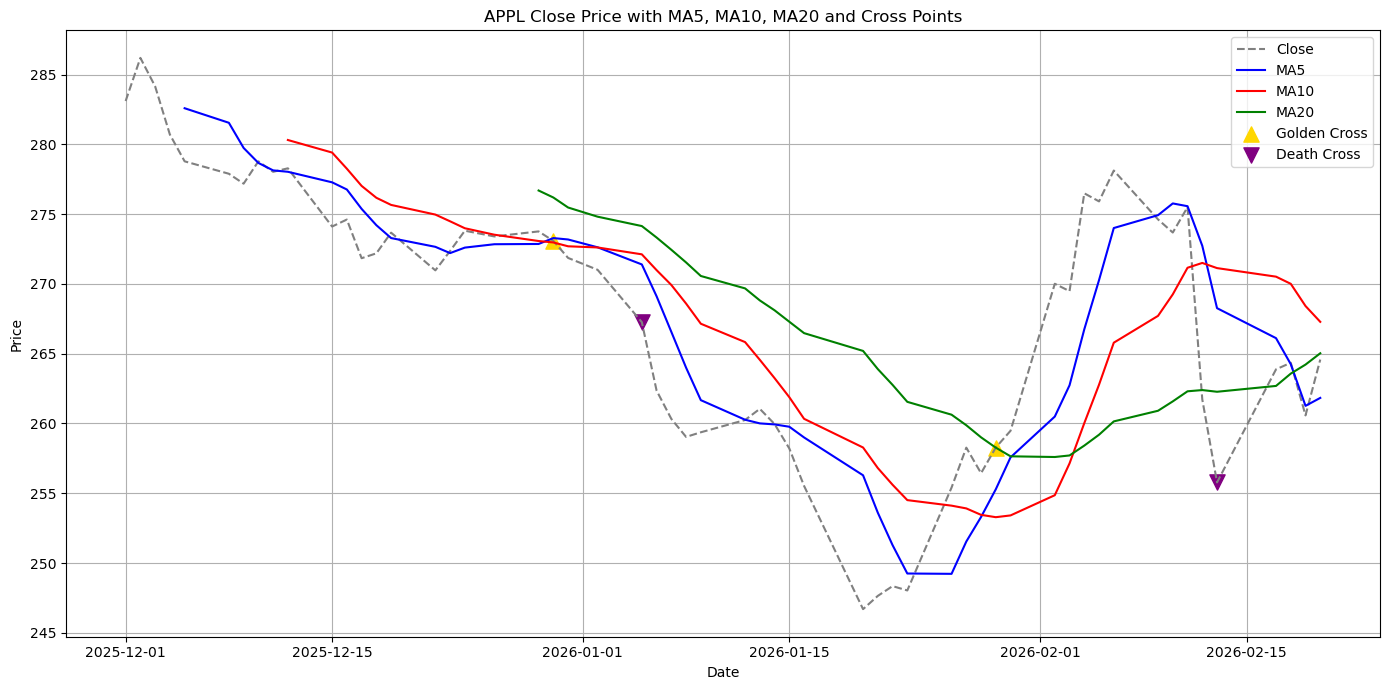

In [13]:
import seaborn as sns

# calculate ma5 ma20 ma60
data['ma5'] = data['Close'].rolling(window=5).mean()
data['ma20'] = data['Close'].rolling(window=20).mean()
data['ma10'] = data['Close'].rolling(window=10).mean()

# plot ma5 ma20 ma10 legend and mark the cross points
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x=data.index, y='Close', label='Close', color='gray', linestyle='--')
sns.lineplot(data=data, x=data.index, y='ma5', label='MA5', color='blue')
sns.lineplot(data=data, x=data.index, y='ma10', label='MA10', color='red')
sns.lineplot(data=data, x=data.index, y='ma20', label='MA20', color='green')

# Detect golden cross (when fast ma crosses above slow ma) and death cross (crosses below)
ma_fast = data['ma5']
ma_slow = data['ma10']
cross_up = (ma_fast > ma_slow) & (ma_fast.shift(1) <= ma_slow.shift(1))
cross_down = (ma_fast < ma_slow) & (ma_fast.shift(1) >= ma_slow.shift(1))

plt.scatter(data.index[cross_up], data['Close'][cross_up], marker='^', color='gold', s=120, label='Golden Cross')
plt.scatter(data.index[cross_down], data['Close'][cross_down], marker='v', color='purple', s=120, label='Death Cross')

plt.title('APPL Close Price with MA5, MA10, MA20 and Cross Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()